In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

In [4]:
df.head()

,.,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df.shape

(271116, 15)

In [6]:
df = df[df['Season'] =='Summer']

In [7]:
df.shape

(222552, 15)

In [8]:
df.tail()

,.,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [9]:
df = df.merge(region_df,on='NOC',how='left')

In [10]:
df.head()

,.,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [11]:
df["region"].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [12]:
df.isnull().sum()

.              0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [13]:
df.duplicated().sum()

1385

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df["Medal"].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [5]:
pd.get_dummies(df["Medal"])

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
271111,0,0,0
271112,0,0,0
271113,0,0,0
271114,0,0,0


In [18]:
df = pd.concat([df,pd.get_dummies(df["Medal"])],axis=1)

In [19]:
df.tail()

,.,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN,0,0,0


In [20]:
df.groupby("NOC").sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(30)

,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
5,FRA,463.0,567.0,587.0
6,HUN,432.0,328.0,363.0
7,SWE,354.0,396.0,358.0
8,AUS,342.0,452.0,510.0
9,GDR,339.0,277.0,227.0


In [21]:
df[(df["NOC"]== "IND") & (df["Medal"]=="Gold")].head(10)

,.,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
8794,5618,Sardar Mohammad Aslam,M,NaN,NaN,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
17790,11197,Vasudevan Bhaskaran,M,29.0,174.0,68.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
18444,11601,Abhinav Bindra,M,25.0,173.0,70.0,India,IND,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India,NaN,0,1,0
20526,12911,Lal Shah S. Bokhari,M,23.0,173.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
24192,15011,Frank Gerald Singlehurst Brewin,M,22.0,NaN,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [22]:
medal_tally = df.drop_duplicates(subset=['Team','region','Games','Year','City','Sport','Event','Medal'])

In [23]:
medal_tally

,.,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


In [24]:
medal_tally = medal_tally.groupby("region").sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [25]:
medal_tally['Total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [26]:
medal_tally

,region,Gold,Silver,Bronze,Total
0,USA,1035.0,802.0,708.0,2545.0
1,Russia,592.0,498.0,487.0,1577.0
2,Germany,444.0,457.0,491.0,1392.0
3,UK,278.0,317.0,300.0,895.0
4,France,234.0,256.0,287.0,777.0
...,...,...,...,...,...
200,Lesotho,0.0,0.0,0.0,0.0
201,Albania,0.0,0.0,0.0,0.0
202,Libya,0.0,0.0,0.0,0.0
203,Liechtenstein,0.0,0.0,0.0,0.0


In [27]:
years = df['Year'].unique().tolist()
years.sort()
years.insert(0, 'Overall')

In [28]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [29]:
country = np.unique(df['region'].dropna().values).tolist()
country.sort()
country.insert(0, 'Overall')

In [30]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [31]:
def fetch_medal_tally(year,country):
    flag = 0
    if year=='Overall' and country=='Overall':
        temp_df = medal_df

    if year=='Overall' and country !='Overall':
        temp_df = medal_df[medal_df['region']== country]
        flag = 1
        
    if year !='Overall' and country=='Overall':
        temp_df = medal_df[medal_df['Year']==int(year)]
        
    if year !='Overall' and country !='Overall':
        temp_df = medal_df[(medal_df['Year']==year) & (medal_df['region']== country)]
    
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',
                                                                                      ascending=False).reset_index()
        
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
        
    print(x)

In [32]:
# fetch_medal_tally(year= 1900,country='Overall')

In [56]:
medal_df = df.drop_duplicates(subset=['Name','Team','region','Games','Year','City','Sport','Event','Medal'])

In [57]:
medal_df[(medal_df['region']== 'Norway') & (medal_df['Year']==1968)]

,.,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
39,28,Jan-Erik Aarberg,M,43.0,170.0,77.0,Norway,NOR,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed Three Person Keelboat,NaN,Norway,NaN,0,0,0
5601,3557,Steinar Amundsen,M,23.0,195.0,88.0,Norway,NOR,1968 Summer,1968,Summer,Mexico City,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,Norway,NaN,0,1,0
6416,4130,Thorleif Steinar Andresen,M,23.0,180.0,75.0,Norway,NOR,1968 Summer,1968,Summer,Mexico City,Cycling,"Cycling Men's Road Race, Individual",NaN,Norway,NaN,0,0,0
6417,4130,Thorleif Steinar Andresen,M,23.0,180.0,75.0,Norway,NOR,1968 Summer,1968,Summer,Mexico City,Cycling,Cycling Men's 100 kilometres Team Time Trial,NaN,Norway,NaN,0,0,0
6427,4132,rnulf Reidar Andresen,M,24.0,183.0,80.0,Norway,NOR,1968 Summer,1968,Summer,Mexico City,Cycling,"Cycling Men's Road Race, Individual",NaN,Norway,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213009,129893,Kjellfred Weum,M,28.0,186.0,79.0,Norway,NOR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 110 metres Hurdles,NaN,Norway,NaN,0,0,0
213705,130273,Kai Georg Wiese,M,28.0,179.0,75.0,Norway,NOR,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed One Person Dinghy,NaN,Norway,NaN,0,0,0
213839,130333,Erik Wiik-Hansen,M,34.0,179.0,87.0,Norway,NOR,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed Three Person Keelboat,NaN,Norway,NaN,0,0,0
213881,130358,Per Olav Wiken,M,31.0,183.0,80.0,Norway,NOR,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed Two Person Keelboat,Silver,Norway,NaN,0,0,1


## Overall Analysis

In [72]:
df['Year'].unique().shape[0]-1

28

In [73]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [74]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [75]:
df['Event'].unique().shape

(651,)

In [76]:
df['Name'].unique().shape     # (athlete) name of players

(116122,)

In [77]:
df['region'].unique().shape[0]

206

In [78]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')

In [79]:
nations_over_time.rename(columns={'index': 'Editions', 'Year': 'NO of countries'}, inplace=True)

In [80]:
nations_over_time

,Editions,NO of countries
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [196]:
import plotly.express as pxd
import matplotlib.pylab as plt

In [197]:
# fig = px.line(nations_over_time, x="Edition", y="NO of countries")

In [198]:
df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('index')

,index,Year
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [199]:
# import seaborn as sns
x = df.drop_duplicates(['Year','Sport','Event'])

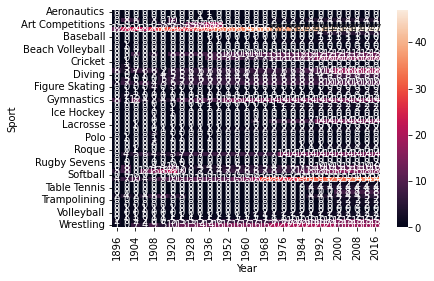

In [200]:
# x.pivot_table(index = 'Sport',columns='Year',values= 'Event',aggfunc='count').fillna(0).astype("int")

ax = sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)

In [201]:
df.dropna(subset=['Medal'])

,.,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0
15,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1,0,0
16,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222532,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,Poland,NaN,1,0,0
222544,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN,1,0,0


In [202]:
# def mostsuccessful(df,sport):
#     temp_df = df.dropna(subset=['Medal'])
    
#     if sport != 'Overall':
#         temp_df = temp_df[temp_df['Sport']==sport]
        
        
#     x= temp_df['Name'].value_counts().reset_index()
#     return x

In [203]:
# mostsuccessful(df,'Overall')

In [204]:
def mostsuccessful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport']==sport]
        
        
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    
    return x

In [205]:
mostsuccessful(df,'Overall')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


In [206]:
temp_df = df.dropna(subset=["Medal"])
temp_df.drop_duplicates(subset=['Team','region','Games','Year','City','Sport','Event','Medal'],inplace=True)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [207]:
new_df = temp_df[temp_df['region']=='USA']
final_df = new_df.groupby('Year').count()["Medal"].reset_index()


In [208]:
final_df

,Year,Medal
0,1896,19
1,1900,54
2,1904,231
3,1906,23
4,1908,46
5,1912,63
6,1920,95
7,1924,99
8,1928,56
9,1932,110


In [209]:
fig = px.line(final_df,x='Year',y='Medal')
fig.show()

In [210]:
temp_df = df.dropna(subset=["Medal"])
temp_df.drop_duplicates(subset=['Team','region','Games','Year','City','Sport','Event','Medal'],inplace=True)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Year', ylabel='Sport'>

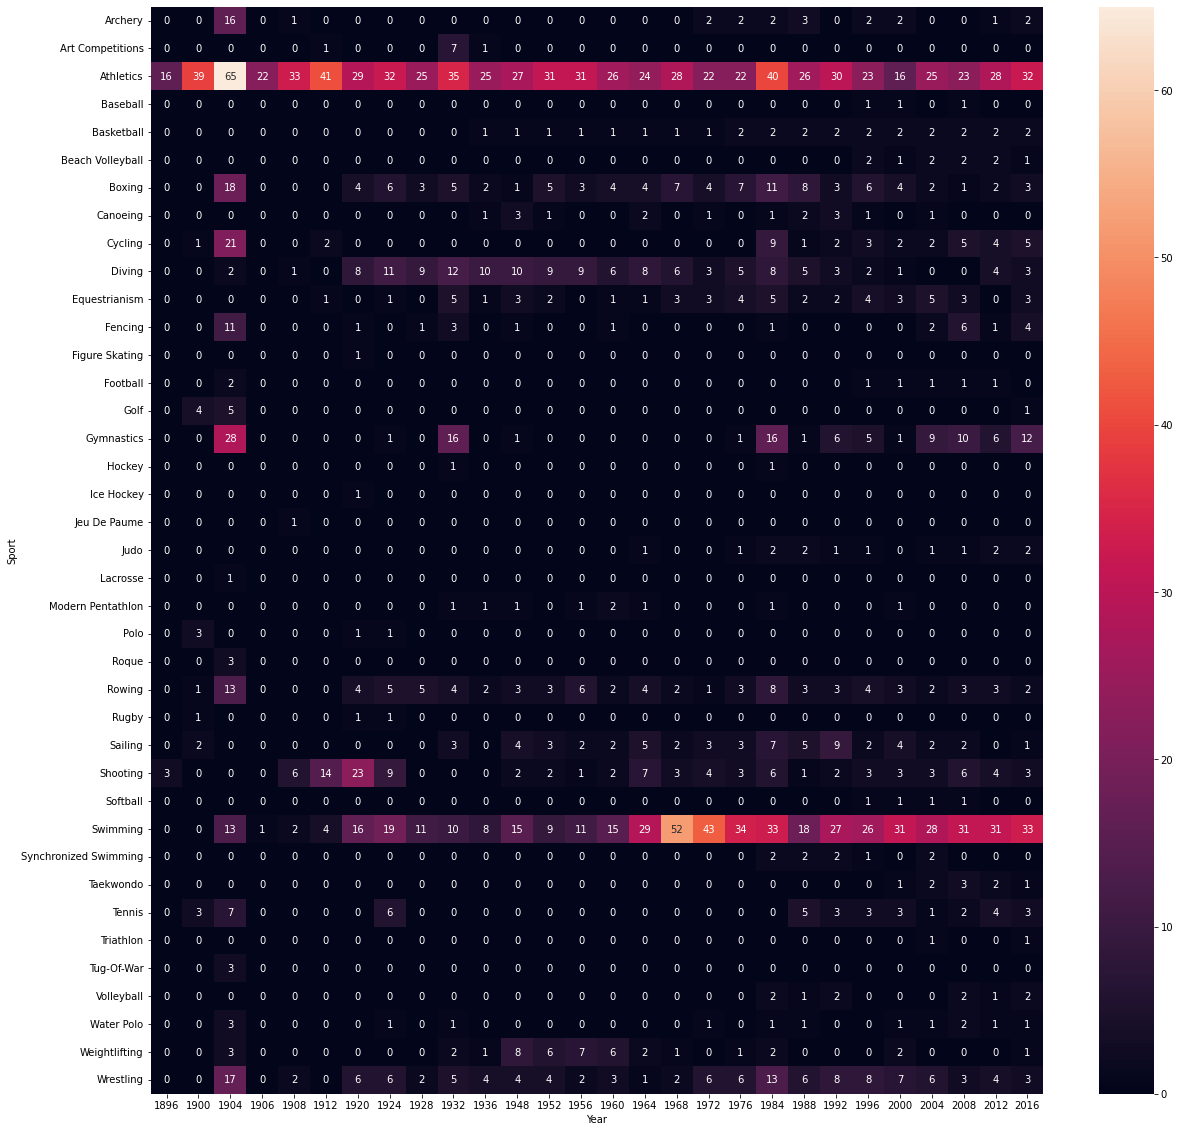

In [212]:
new_df = temp_df[temp_df['region']=='USA']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype('int'),annot=True)

In [215]:
def mostsuccessful(df,country):
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region']==country]
              
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    
    return x

In [218]:
mostsuccessful(df,'USA')

,Name,Medals,Sport
0,"Michael Fred Phelps, II",28,Swimming
30,Ryan Steven Lochte,12,Swimming
44,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
61,Natalie Anne Coughlin (-Hall),12,Swimming
73,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
86,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
98,Carl Townsend Osburn,11,Shooting
114,Mark Andrew Spitz,11,Swimming
126,"Raymond Clarence ""Ray"" Ewry",10,Athletics
136,"Frederick Carlton ""Carl"" Lewis",10,Athletics
